In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [ ]:
path="/content/drive/MyDrive/potato/PlantVillage"

In [ ]:
image_size=256
BATCH_SIZE=32
train_size=0.8
test_size=0.1
validation_size=0.1

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    path,shuffle=True,image_size=(image_size,image_size),batch_size=(BATCH_SIZE)
)

Found 2152 files belonging to 3 classes.


In [ ]:
classname=dataset.class_names
print(classname)
print(len(dataset))

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
68


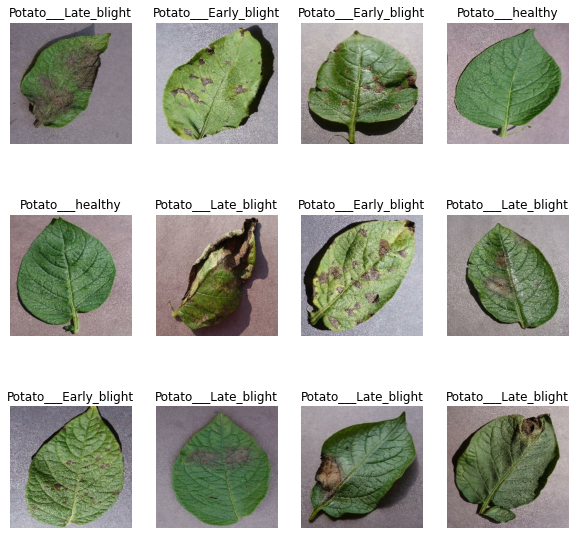

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype(int))
        plt.title(classname[labels_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(image_size, image_size),
  layers.Rescaling(1./255)
])
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
     layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(image_size,image_size)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classname), activation='softmax')
 
])
input_shape = (BATCH_SIZE, image_size, image_size, 3)
model.build(input_shape=(input_shape))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=25,
)

Epoch 1/25
54/54 [==============================] - ETA: 0s - loss: 0.9058 - accuracy: 0.4809

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 8s 147ms/step - loss: 0.9058 - accuracy: 0.4809 - val_loss: 0.8898 - val_accuracy: 0.4271
Epoch 2/25
54/54 [==============================] - 4s 70ms/step - loss: 0.6805 - accuracy: 0.6875 - val_loss: 0.4083 - val_accuracy: 0.8490
Epoch 3/25
54/54 [==============================] - 4s 70ms/step - loss: 0.3614 - accuracy: 0.8588 - val_loss: 0.2905 - val_accuracy: 0.8698
Epoch 4/25
54/54 [==============================] - 4s 70ms/step - loss: 0.2739 - accuracy: 0.8900 - val_loss: 0.2383 - val_accuracy: 0.9010
Epoch 5/25
54/54 [==============================] - 4s 70ms/step - loss: 0.2455 - accuracy: 0.8999 - val_loss: 0.2232 - val_accuracy: 0.9115
Epoch 6/25
54/54 [==============================] - 4s 70ms/step - loss: 0.2387 - accuracy: 0.9016 - val_loss: 0.2139 - val_accuracy: 0.9271
Epoch 7/25
54/54 [==============================] - 4s 71ms/step - loss: 0.1939 - accuracy: 0.9184 - val_loss: 0.2385 - val_accuracy: 0.9167
Epoch 8/25
54/54 [=====

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


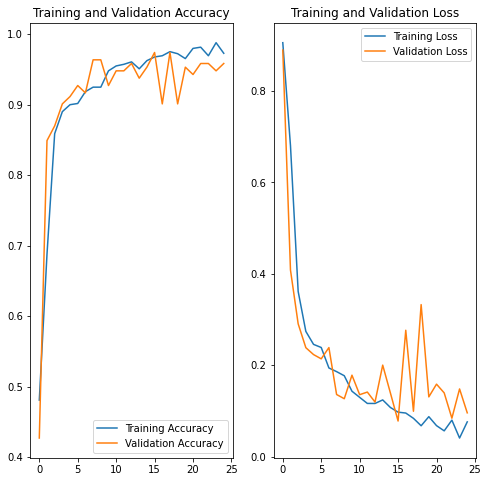

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(25), acc, label='Training Accuracy')
plt.plot(range(25), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(25), loss, label='Training Loss')
plt.plot(range(25), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


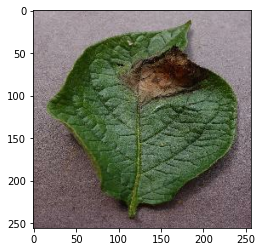

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classname[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",classname[np.argmax(batch_prediction[0])])

In [ ]:
model.save('my_model.h5')